In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import drag_functions_turb as fn
from time_TvsR import *
from PebAcc_Turb import *

%load_ext autoreload
%autoreload 2

## Pebble Size vs Growth Time

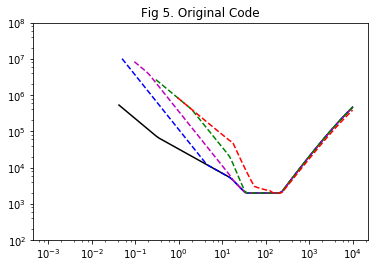

In [2]:
s_array = np.logspace(-3,4,100)
t_growth = np.zeros([s_array.size, 5])
min1_arr = np.zeros(t_growth.shape)
r_hill_arr = np.zeros(t_growth.shape)
r_bondi_arr = np.zeros(t_growth.shape)
r_shear_arr = np.zeros(t_growth.shape)

for i in range(s_array.size):
    t_growth[i,0], min1_arr[i,0], r_hill_arr[i,0], r_bondi_arr[i,0], r_shear_arr[i,0] = TvsR_sng(alph=1e-100, a_au=1, m_suns=1, m_earths=1e-1, r=s_array[i], out='len')
    t_growth[i,1], min1_arr[i,1], r_hill_arr[i,1], r_bondi_arr[i,1], r_shear_arr[i,1] = TvsR_sng(alph=1e-4, a_au=1, m_suns=1, m_earths=1e-1, r=s_array[i], out='len')
    t_growth[i,2], min1_arr[i,2], r_hill_arr[i,2], r_bondi_arr[i,2], r_shear_arr[i,2] = TvsR_sng(alph=1e-3, a_au=1, m_suns=1, m_earths=1e-1, r=s_array[i], out='len')
    t_growth[i,3], min1_arr[i,3], r_hill_arr[i,3], r_bondi_arr[i,3], r_shear_arr[i,3] = TvsR_sng(alph=1e-2, a_au=1, m_suns=1, m_earths=1e-1, r=s_array[i], out='len')
    t_growth[i,4], min1_arr[i,4], r_hill_arr[i,4], r_bondi_arr[i,4], r_shear_arr[i,4] = TvsR_sng(alph=1e-1, a_au=1, m_suns=1, m_earths=1e-1, r=s_array[i], out='len')
    
plt.loglog(s_array, t_growth[:,0], 'k')
plt.loglog(s_array, t_growth[:,1], 'b--')
plt.loglog(s_array, t_growth[:,2], 'm--')
plt.loglog(s_array, t_growth[:,3], 'g--')
plt.loglog(s_array, t_growth[:,4], 'r--')
plt.ylim(1e2,1e8)
plt.title("Fig 5. Original Code")
plt.show()

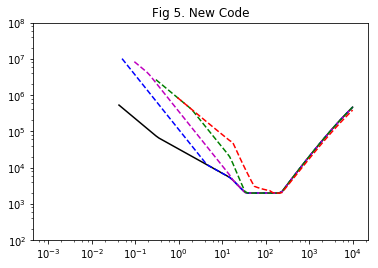

In [3]:
t_growth2 = np.zeros([s_array.size, 5])
min1_arr2 = np.zeros(t_growth.shape)
r_hill_arr2 = np.zeros(t_growth.shape)
r_bondi_arr2 = np.zeros(t_growth.shape)
r_shear_arr2 = np.zeros(t_growth.shape)

# Initializes the core objects
core_lam = Core(a_core_au=1, m_core_earthmasses=1e-1, alpha=1e-100, m_star_solarmasses=1, gas_dep=1,
                sol_gas_ratio=.01, rho_core=5.51)
core_a4 = Core(a_core_au=1, m_core_earthmasses=1e-1, alpha=1e-4, m_star_solarmasses=1, gas_dep=1,
                sol_gas_ratio=.01, rho_core=5.51)
core_a3 = Core(a_core_au=1, m_core_earthmasses=1e-1, alpha=1e-3, m_star_solarmasses=1, gas_dep=1,
                sol_gas_ratio=.01, rho_core=5.51)
core_a2 = Core(a_core_au=1, m_core_earthmasses=1e-1, alpha=1e-2, m_star_solarmasses=1, gas_dep=1,
                sol_gas_ratio=.01, rho_core=5.51)
core_a1 = Core(a_core_au=1, m_core_earthmasses=1e-1, alpha=1e-1, m_star_solarmasses=1, gas_dep=1,
                sol_gas_ratio=.01, rho_core=5.51)
for i in range(s_array.size):
    core_lam.main(s_array[i])
    core_a4.main(s_array[i])
    core_a3.main(s_array[i])
    core_a2.main(s_array[i])
    core_a1.main(s_array[i])
    t_growth2[i,0] = core_lam.t_acc
    t_growth2[i,1] = core_a4.t_acc
    t_growth2[i,2] = core_a3.t_acc
    t_growth2[i,3] = core_a2.t_acc
    t_growth2[i,4] = core_a1.t_acc
    min1_arr2[i,0] = np.minimum(core_lam.r_ws, core_lam.r_sh)
    min1_arr2[i,1] = np.minimum(core_a4.r_ws, core_a4.r_sh)
    min1_arr2[i,2] = np.minimum(core_a3.r_ws, core_a3.r_sh)
    min1_arr2[i,3] = np.minimum(core_a2.r_ws, core_a2.r_sh)
    min1_arr2[i,4] = np.minimum(core_a1.r_ws, core_a1.r_sh)
    r_hill_arr2[i,0] = core_lam.r_hill
    r_hill_arr2[i,1] = core_a4.r_hill
    r_hill_arr2[i,2] = core_a3.r_hill
    r_hill_arr2[i,3] = core_a2.r_hill
    r_hill_arr2[i,4] = core_a1.r_hill
    r_bondi_arr2[i,0] = core_lam.r_bondi
    r_bondi_arr2[i,1] = core_a4.r_bondi
    r_bondi_arr2[i,2] = core_a3.r_bondi
    r_bondi_arr2[i,3] = core_a2.r_bondi
    r_bondi_arr2[i,4] = core_a1.r_bondi
    r_shear_arr2[i,0] = core_lam.r_sh
    r_shear_arr2[i,1] = core_a4.r_sh
    r_shear_arr2[i,2] = core_a3.r_sh
    r_shear_arr2[i,3] = core_a2.r_sh
    r_shear_arr2[i,4] = core_a1.r_sh
    
plt.loglog(s_array, t_growth2[:,0], 'k')
plt.loglog(s_array, t_growth2[:,1], 'b--')
plt.loglog(s_array, t_growth2[:,2], 'm--')
plt.loglog(s_array, t_growth2[:,3], 'g--')
plt.loglog(s_array, t_growth2[:,4], 'r--')
plt.ylim(1e2,1e8)
plt.title("Fig 5. New Code")
plt.show()

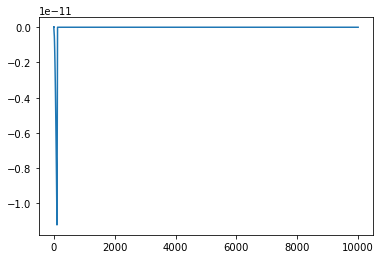

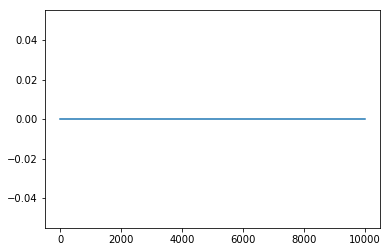

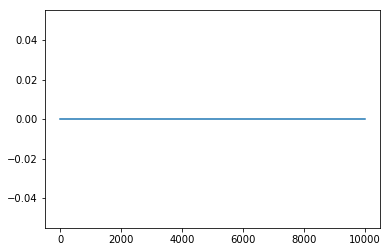

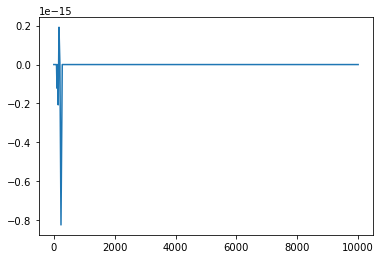

In [8]:
#min1_arr[i,0], r_hill_arr[i,0], r_bondi_arr[i,0], r_shear_arr[i,0]
#min1_arr2[i,0], r_hill_arr2[i,0], r_bondi_arr2[i,0], r_shear_arr2[i,0]

i = 4
plt.plot(s_array, (min1_arr2[:,i] - min1_arr[:,i])/min1_arr[:,i])
plt.show()
plt.plot(s_array, (r_hill_arr2[:,i] - r_hill_arr[:,i])/r_hill_arr[:,i])
plt.show()
plt.plot(s_array, (r_bondi_arr2[:,i] - r_bondi_arr[:,i])/r_bondi_arr[:,i])
plt.show()
plt.plot(s_array, (r_shear_arr2[:,i] - r_shear_arr[:,i])/r_shear_arr[:,i])
plt.show()

## Growth time vs Turbulence strength

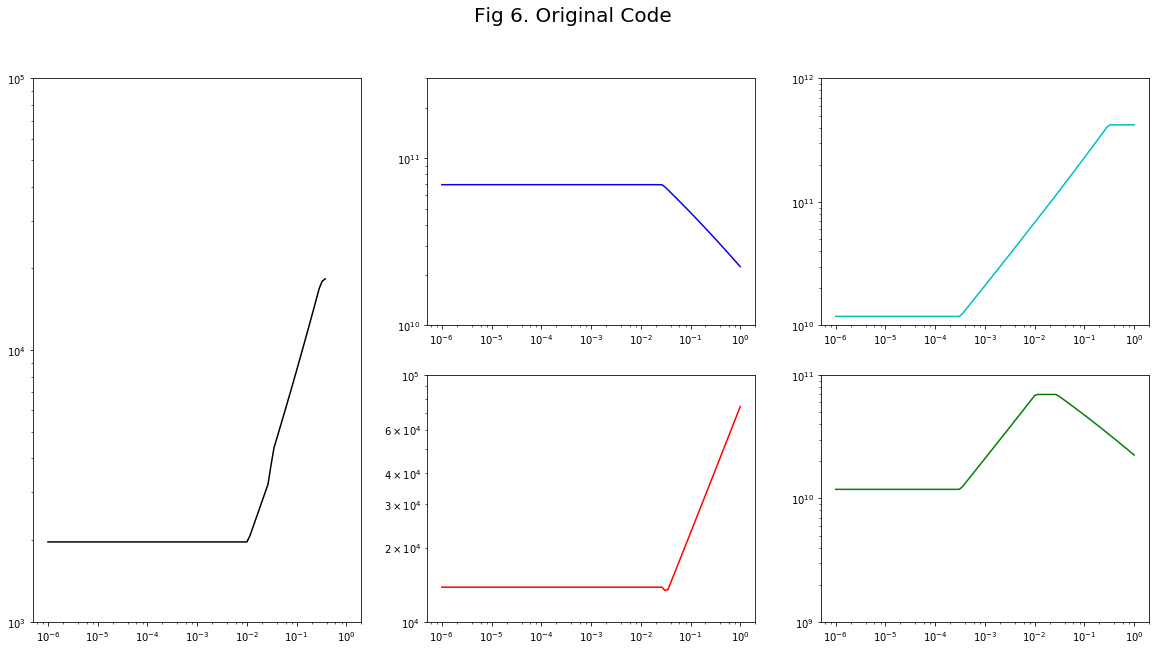

In [9]:
from matplotlib import gridspec

alpha_array = np.logspace(-6,0,100)
t_growth = np.zeros(s_array.size)
r_acc_arr = np.zeros(t_growth.shape)
H_p_arr = np.zeros(t_growth.shape)
v_inf_arr = np.zeros(t_growth.shape)
H_acc_arr = np.zeros(t_growth.shape)

for i in range(alpha_array.size):
    t_growth[i], H_p_arr[i], sig_p, r_acc_arr[i], H_acc_arr[i], v_inf_arr[i] = TvsR_sng(alph=alpha_array[i], a_au=1, m_suns=1, m_earths=1e-1, r=35, out='time_param')

# Setup figure and grid
fig = plt.figure(figsize=(20,10))
gs = gridspec.GridSpec(2, 3)

ax0 = plt.subplot(gs[:,0])    
ax0.loglog(alpha_array, t_growth, 'k-')
ax0.set_ylim(1e3,1e5)

ax1 = plt.subplot(gs[0,1])
ax1.loglog(alpha_array, r_acc_arr, 'b-')
ax1.set_ylim(1e10, 3e11)

ax2 = plt.subplot(gs[0,2])
ax2.loglog(alpha_array, H_p_arr, 'c-')
ax2.set_ylim(1e10, 1e12)

ax3 = plt.subplot(gs[1,1])
ax3.loglog(alpha_array, v_inf_arr, 'r-')
ax3.set_ylim(1e4, 1e5)

ax4 = plt.subplot(gs[1,2])
ax4.loglog(alpha_array, H_acc_arr, 'g-')
ax4.set_ylim(1e9, 1e11)

fig.suptitle("Fig 6. Original Code", size=20)
plt.show()

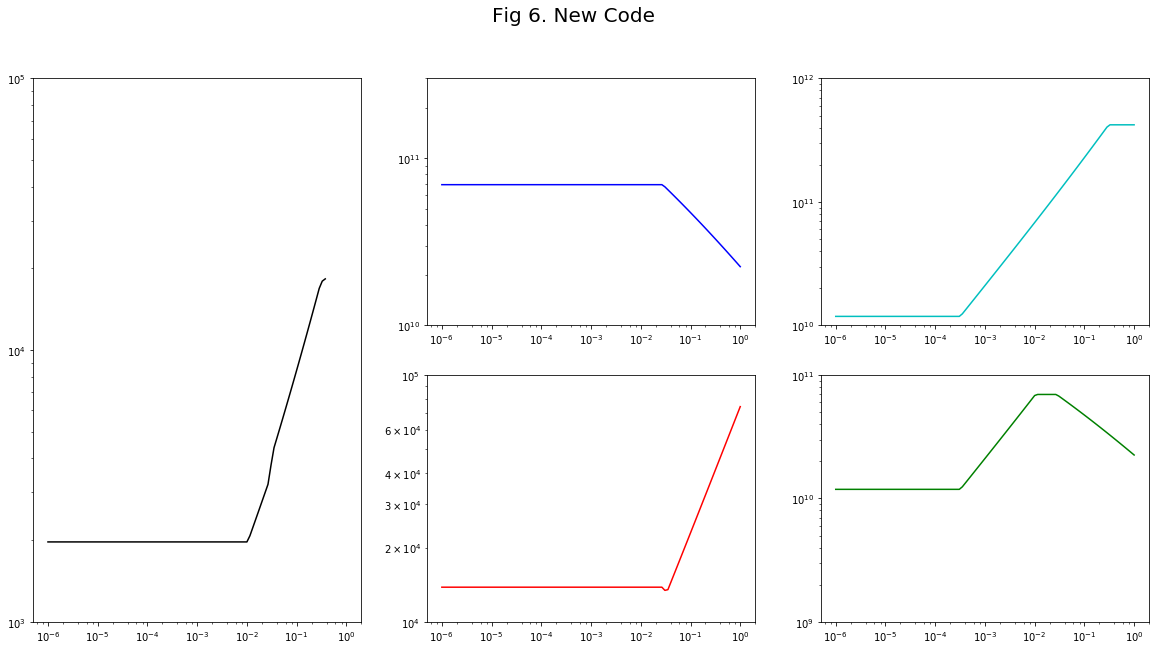

In [12]:
t_growth2 = np.zeros(alpha_array.size)
r_acc_arr2 = np.zeros(t_growth.shape)
H_p_arr2 = np.zeros(t_growth.shape)
v_inf_arr2 = np.zeros(t_growth.shape)
H_acc_arr2 = np.zeros(t_growth.shape)

# Initializes the core objects
for i in range(alpha_array.size):
    core = Core(a_core_au=1, m_core_earthmasses=1e-1, alpha=alpha_array[i], m_star_solarmasses=1, gas_dep=1,
                sol_gas_ratio=.01, rho_core=5.51)
    core.main(s=35)
    t_growth2[i] = core.t_acc
    r_acc_arr2[i] = core.r_acc
    H_p_arr2[i] = core.H_disk
    v_inf_arr2[i] = core.v_inf
    H_acc_arr2[i] = core.H_acc
    
# Setup figure and grid
fig = plt.figure(figsize=(20,10))
gs = gridspec.GridSpec(2, 3)

ax0 = plt.subplot(gs[:,0])    
ax0.loglog(alpha_array, t_growth2, 'k-')
ax0.set_ylim(1e3,1e5)

ax1 = plt.subplot(gs[0,1])
ax1.loglog(alpha_array, r_acc_arr2, 'b-')
ax1.set_ylim(1e10, 3e11)

ax2 = plt.subplot(gs[0,2])
ax2.loglog(alpha_array, H_p_arr2, 'c-')
ax2.set_ylim(1e10, 1e12)

ax3 = plt.subplot(gs[1,1])
ax3.loglog(alpha_array, v_inf_arr2, 'r-')
ax3.set_ylim(1e4, 1e5)

ax4 = plt.subplot(gs[1,2])
ax4.loglog(alpha_array, H_acc_arr2, 'g-')
ax4.set_ylim(1e9, 1e11)

fig.suptitle("Fig 6. New Code", size=20)
plt.show()

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in true_divide


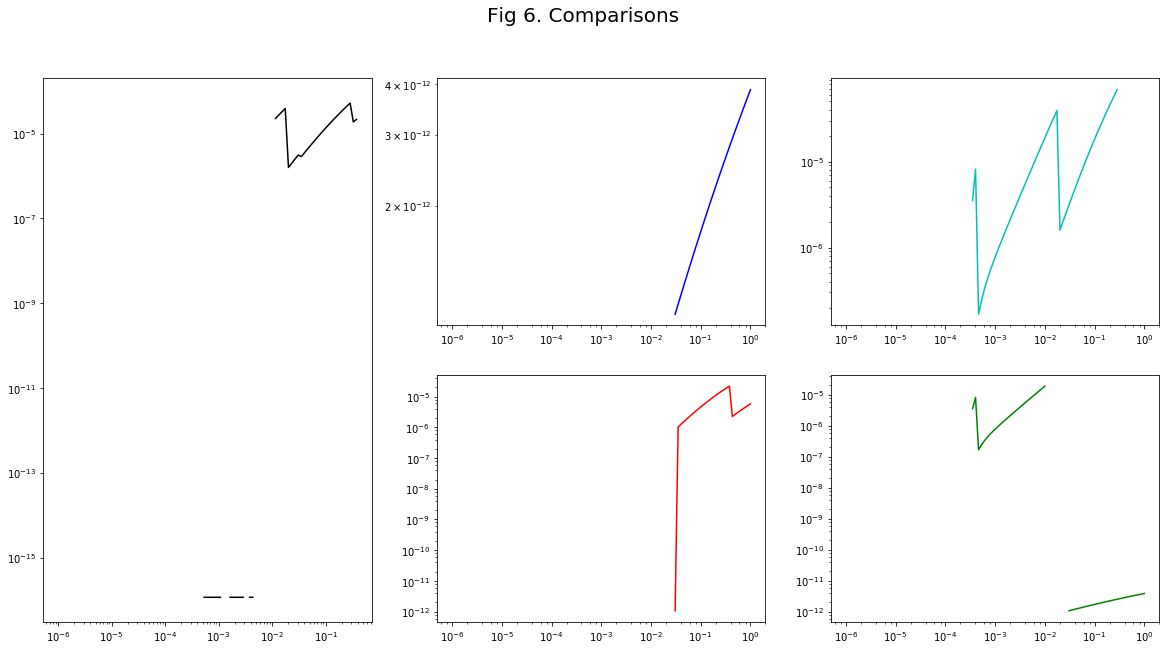

In [14]:
fig = plt.figure(figsize=(20,10))
gs = gridspec.GridSpec(2, 3)

ax0 = plt.subplot(gs[:,0])    
ax0.loglog(alpha_array, np.abs(t_growth2 - t_growth)/t_growth, 'k-')
#ax0.set_ylim(1e3,1e5)

ax1 = plt.subplot(gs[0,1])
ax1.loglog(alpha_array, np.abs(r_acc_arr2 - r_acc_arr)/r_acc_arr, 'b-')
#ax1.set_ylim(1e10, 3e11)

ax2 = plt.subplot(gs[0,2])
ax2.loglog(alpha_array, np.abs(H_p_arr2 - H_p_arr)/H_p_arr, 'c-')
#ax2.set_ylim(1e10, 1e12)

ax3 = plt.subplot(gs[1,1])
ax3.loglog(alpha_array, np.abs(v_inf_arr2 - v_inf_arr)/v_inf_arr, 'r-')
#ax3.set_ylim(1e4, 1e5)

ax4 = plt.subplot(gs[1,2])
ax4.loglog(alpha_array, np.abs(H_acc_arr2 - H_acc_arr)/H_acc_arr, 'g-')
#ax4.set_ylim(1e9, 1e11)

fig.suptitle("Fig 6. Comparisons", size=20)
plt.show()

## Growth Time vs Core Mass and Particle Size

Exists
0 1e-100 -4.0 4.0
Exists
1 0.001 -4.0 4.0
Exists
2 0.01 -4.0 4.0
Exists
3 0.1 -4.0 4.0


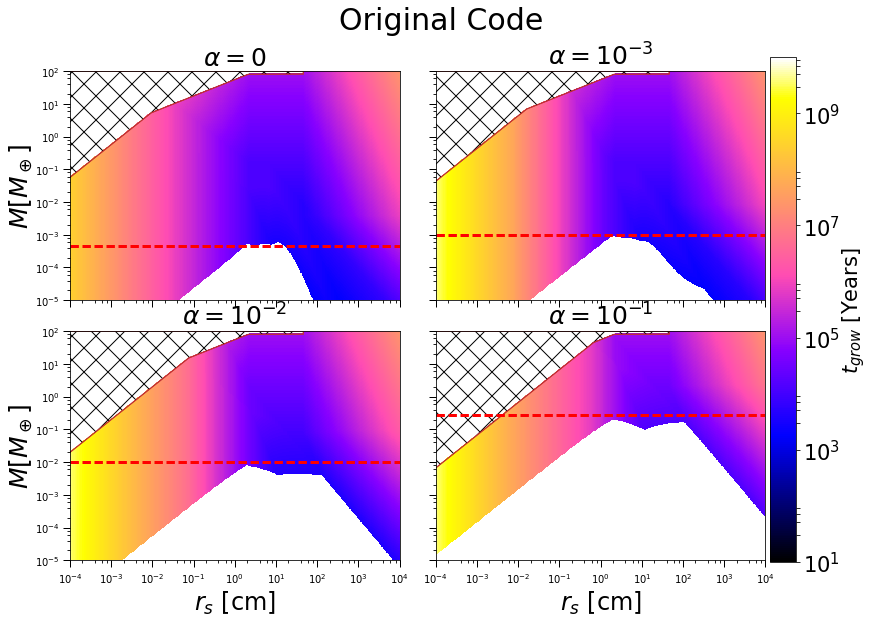

In [17]:
import os
from matplotlib.colors import LogNorm

semi_maj = 30.
alph_arr = [1e-100,1e-3,1e-2,1e-1]

T = 200*semi_maj**(-3./7.)
c_s = np.sqrt(fn.k*T/fn.mu)
om = np.sqrt(fn.G*fn.m_sun/(semi_maj*fn.au)**3.)
vk = semi_maj*fn.au*om
eta = c_s**2./2./vk**2.

cmap = 'gnuplot2'

file_names = ['rev6_a_30.0_M_*_1.0_alph_0.00000_long_grid_2', 'rev6_a_30.0_M_*_1.0_alph_0.00100_long_grid_2',
              'rev6_a_30.0_M_*_1.0_alph_0.01000_long_grid_2', 'rev6_a_30.0_M_*_1.0_alph_0.10000_long_grid_2']

fig = plt.figure(1,figsize=(12,9))

for j,fname in enumerate(file_names):

    fname_param = fname + '_params.txt'
    f = open('txt_files/' + fname_param,'r')
    param_arr = f.readlines()
    param_arr = [float(i) for i in param_arr]
    f.close()
    m_range_low,m_range_hi,r_range_low,r_range_hi,m_star,semi_major,alph = param_arr

    m_arr = np.logspace(m_range_low,m_range_hi,num=1000)
    r_arr = np.logspace(r_range_low,r_range_hi,num=300)
    
    st_arr = [st_rad(a_au=semi_maj,rad=r) for r in r_arr]

    ax = plt.subplot(2,2,j+1)
    
    if os.path.exists('txt_files/' + fname + '.txt'):
        time_arr = np.loadtxt('txt_files/' + fname + '.txt')
        print("Exists")
    else:
        time_arr = np.loadtxt('txt_files/' + fname)
        print("Does Not Exist")
        
    print(j,alph, r_range_low, r_range_hi)
    
    if j == 0:
        plt.title(r'$\alpha = 0$',fontsize=25)
    else:
        plt.title(r'$\alpha = 10^{%.3g}$' %np.log10(alph),fontsize=25)
        
    X, Y = np.meshgrid(r_arr,m_arr)
    im = plt.pcolormesh(X,Y,time_arr, cmap=cmap,norm=LogNorm(),vmin=1e1,vmax=1e10)

    plt.xscale('log')
    plt.yscale('log')
    
    im.set_edgecolor('face')
    ax = plt.gca()
    ax.tick_params(which='major', length=7,width=1.0)
    ax.tick_params(which='minor', length=3.0,width=0.85)
    
    if j==0:
        ax.tick_params(labelbottom='off') 
        plt.ylabel(r'$M \left[ M_\oplus \right]$',fontsize=25,labelpad=0.03)
    if j==1:
        ax.tick_params(labelbottom='off') 
        ax.tick_params(labelleft='off')
    if j==2:
        plt.xlabel(r'$r_{s}$ [cm]',fontsize=24)
        plt.ylabel(r'$M \left[ M_\oplus \right]$',fontsize=25,labelpad=0.03)
    if j==3:
        ax.tick_params(labelleft='off')
        plt.xlabel(r'$r_{s}$ [cm]',fontsize=24)
    
    plt.axis(np.power(10,[r_range_low,r_range_hi,m_range_low,m_range_hi]))
    
    rad_min_1 = 3.07707e-4*np.sqrt(1.45026e6*(semi_maj)**(1./7.)+7.17403e9*alph_arr[j]*semi_maj**(-3./7))*m_arr*(semi_maj)**(-23./14.)
    rad_min_2 = 3.40532*(semi_maj)**(-19./7.)*(m_arr)**2.
    
    v_gas = np.sqrt(alph_arr[j]*c_s**2. + eta**2.*vk**2.)
    rad_min_3 = 7.95148e-8*(semi_maj)**(-5./2.)*m_arr**(-1./3.)*v_gas
    
    rad_min = np.maximum(rad_min_1,rad_min_2)
    rad_min = np.maximum(rad_min,rad_min_3)
    
    m_crit = 4.28453*(semi_maj)**(6./7.)
    m_crit_ind = np.where(m_arr<m_crit)[0][-1]
    r_s_crit = st_solver(a_au=semi_maj,st=4.*(3)**(1./2.))
    rad_min[m_crit_ind+2::] = r_s_crit

    plt.fill_betweenx(m_arr,1e-10,rad_min,facecolor='none',edgecolor='#C13131',hatch='/')
    plt.fill_betweenx(m_arr,1e-10,rad_min,facecolor='none',edgecolor='#C13131',hatch='\\')
    
    m_crit = 7.87221e-16*(semi_maj)**(3./2.)*v_gas**3.
    plt.axhline(y=m_crit,linestyle='dashed',linewidth=3,color='r')
    
    
cax = fig.add_axes([0.88, 0.123, 0.03, 0.778])
cb = fig.colorbar(im, cax=cax,cmap=cmap,norm=LogNorm())
cb.set_label(label=r'$t_{grow}$ [Years]',fontsize=21,labelpad=0.1)
cb.ax.tick_params(labelsize=21)
plt.subplots_adjust(left=0.070,right=0.875,hspace=0.135,wspace=0.11)
fig.suptitle("Original Code", size=30)

In [18]:
m_array = np.logspace(-5,2,1000)
s_array = np.logspace(-4,4,300)
t_growth_cb = np.zeros([m_array.size, s_array.size, 4])

for j, M in enumerate(m_array):
    # Initializes the core objects
    core_lam = Core(a_core_au=30, m_core_earthmasses=M, alpha=1e-100, m_star_solarmasses=1, gas_dep=1,
                sol_gas_ratio=.01, rho_core=5.51)
    core_a3 = Core(a_core_au=30, m_core_earthmasses=M, alpha=1e-3, m_star_solarmasses=1, gas_dep=1,
                sol_gas_ratio=.01, rho_core=5.51)
    core_a2 = Core(a_core_au=30, m_core_earthmasses=M, alpha=1e-2, m_star_solarmasses=1, gas_dep=1,
                sol_gas_ratio=.01, rho_core=5.51)
    core_a1 = Core(a_core_au=30, m_core_earthmasses=M, alpha=1e-1, m_star_solarmasses=1, gas_dep=1,
                sol_gas_ratio=.01, rho_core=5.51)

    for i in range(s_array.size):
        core_lam.main(s_array[i])
        core_a3.main(s_array[i])
        core_a2.main(s_array[i])
        core_a1.main(s_array[i])
        
        t_growth_cb[j, i, 0] = core_lam.t_acc
        t_growth_cb[j, i, 1] = core_a3.t_acc
        t_growth_cb[j, i, 2] = core_a2.t_acc
        t_growth_cb[j, i, 3] = core_a1.t_acc

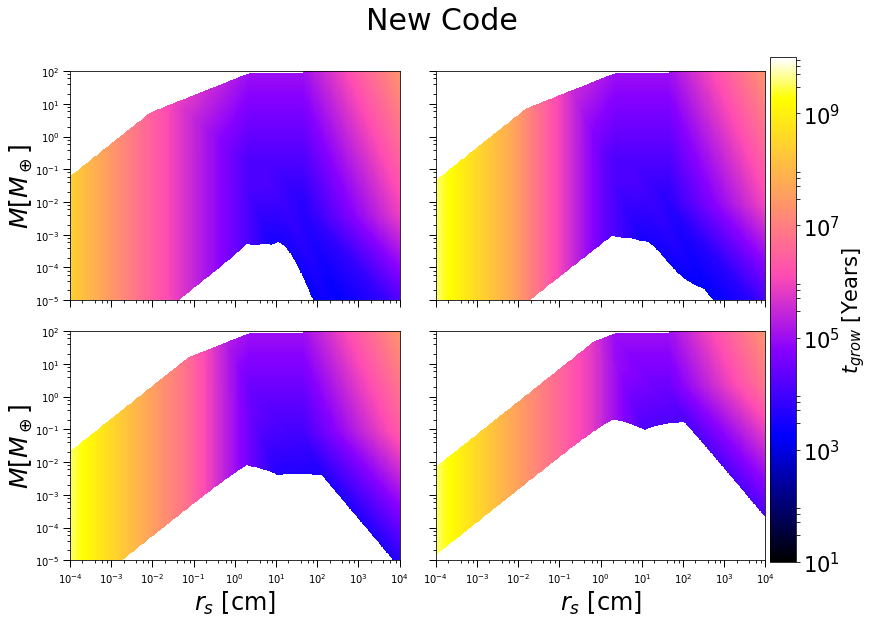

In [19]:
fig = plt.figure(1,figsize=(12,9))        
for j in range(4):
    ax = plt.subplot(2,2,j+1)
    X, Y = np.meshgrid(s_array, m_array)
    im = plt.pcolormesh(X,Y,t_growth_cb[:,:,j], cmap=cmap,norm=LogNorm(),vmin=1e1,vmax=1e10)

    plt.xscale('log')
    plt.yscale('log')
    
    im.set_edgecolor('face')
    ax = plt.gca()
    ax.tick_params(which='major', length=7,width=1.0)
    ax.tick_params(which='minor', length=3.0,width=0.85)
    
    if j==0:
        ax.tick_params(labelbottom='off') 
        plt.ylabel(r'$M \left[ M_\oplus \right]$',fontsize=25,labelpad=0.03)
    if j==1:
        ax.tick_params(labelbottom='off') 
        ax.tick_params(labelleft='off')
    if j==2:
        plt.xlabel(r'$r_{s}$ [cm]',fontsize=24)
        plt.ylabel(r'$M \left[ M_\oplus \right]$',fontsize=25,labelpad=0.03)
    if j==3:
        ax.tick_params(labelleft='off')
        plt.xlabel(r'$r_{s}$ [cm]',fontsize=24)
    
    plt.axis(np.power(10,[r_range_low,r_range_hi,m_range_low,m_range_hi]))

cax = fig.add_axes([0.88, 0.123, 0.03, 0.778])
cb = fig.colorbar(im, cax=cax,cmap=cmap,norm=LogNorm())
cb.set_label(label=r'$t_{grow}$ [Years]',fontsize=21,labelpad=0.1)
cb.ax.tick_params(labelsize=21)
plt.subplots_adjust(left=0.070,right=0.875,hspace=0.135,wspace=0.11)
fig.suptitle("New Code", size=30)

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in true_divide


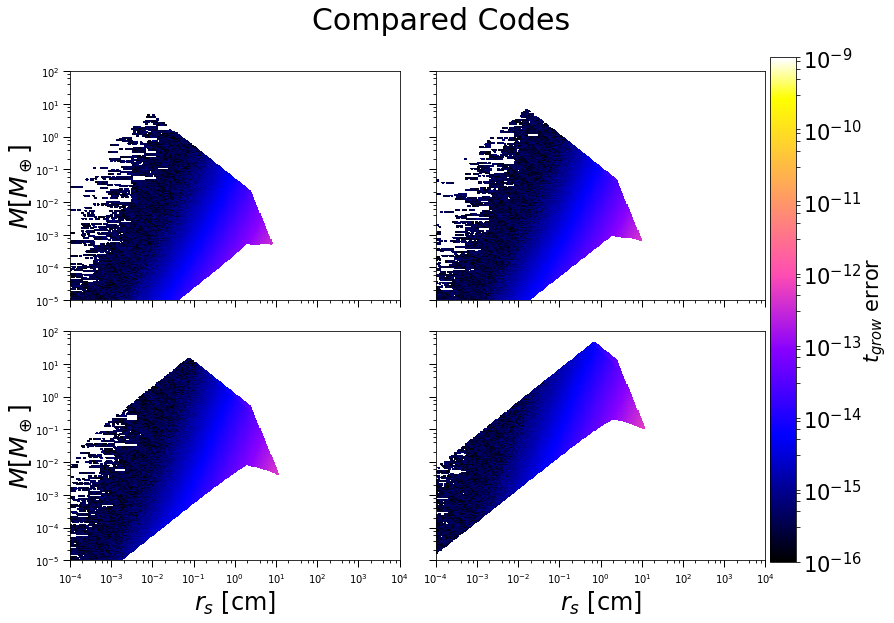

In [20]:
t_error = np.zeros(t_growth_cb.shape)
for j,fname in enumerate(file_names):
    time_arr = np.loadtxt('txt_files/' + fname + '.txt')
    
    t_error[:,:,j] = (t_growth_cb[:,:,j] - time_arr)/time_arr
    t_error[:,:,j][np.where(time_arr == 0)] = 0
    
fig = plt.figure(1,figsize=(12,9))        
for j in range(4):
    ax = plt.subplot(2,2,j+1)
    X, Y = np.meshgrid(s_array, m_array)
    im = plt.pcolormesh(X,Y,np.abs(t_error[:,:,j]), cmap=cmap,norm=LogNorm(),vmin=1e-16,vmax=1e-9)

    plt.xscale('log')
    plt.yscale('log')
    
    im.set_edgecolor('face')
    ax = plt.gca()
    ax.tick_params(which='major', length=7,width=1.0)
    ax.tick_params(which='minor', length=3.0,width=0.85)
    
    if j==0:
        ax.tick_params(labelbottom='off') 
        plt.ylabel(r'$M \left[ M_\oplus \right]$',fontsize=25,labelpad=0.03)
    if j==1:
        ax.tick_params(labelbottom='off') 
        ax.tick_params(labelleft='off')
    if j==2:
        plt.xlabel(r'$r_{s}$ [cm]',fontsize=24)
        plt.ylabel(r'$M \left[ M_\oplus \right]$',fontsize=25,labelpad=0.03)
    if j==3:
        ax.tick_params(labelleft='off')
        plt.xlabel(r'$r_{s}$ [cm]',fontsize=24)
    
    plt.axis(np.power(10,[r_range_low,r_range_hi,m_range_low,m_range_hi]))
    
cax = fig.add_axes([0.88, 0.123, 0.03, 0.778])
cb = fig.colorbar(im, cax=cax,cmap=cmap,norm=LogNorm())
cb.set_label(label=r'$t_{grow}$ error',fontsize=21,labelpad=0.1)
cb.ax.tick_params(labelsize=21)
plt.subplots_adjust(left=0.070,right=0.875,hspace=0.135,wspace=0.11)
fig.suptitle("Compared Codes", size=30)

## Below is from NESSF Proposal

0 1e-100 0.0 4.0
1 0.0001 0.0 4.0


//anaconda/lib/python3.5/site-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


yes


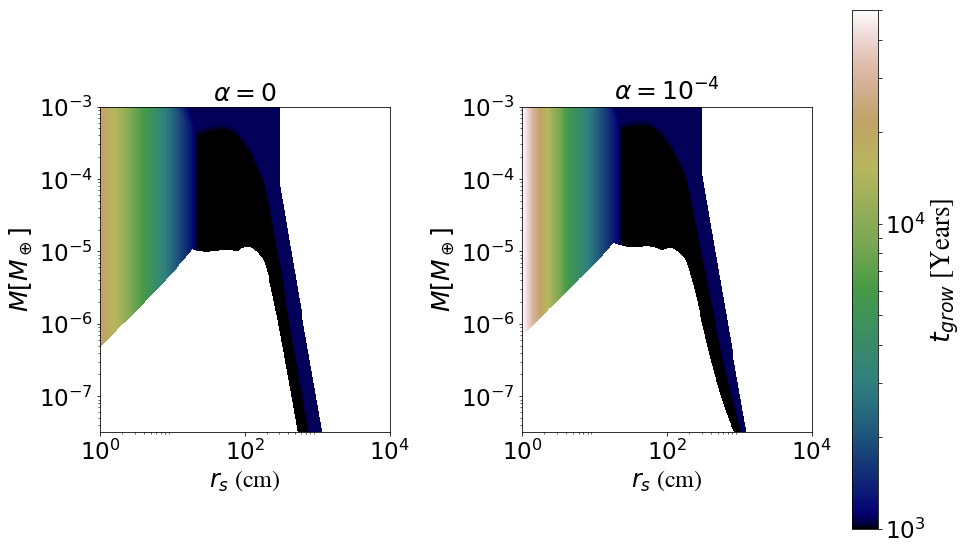

In [7]:
from matplotlib.colors import LogNorm
import os

#Flags
save_fig = 1

plt.rcParams['figure.figsize'] = (6,5)
plt.rcParams['legend.frameon'] = True
plt.rcParams['font.family'] = 'stixgeneral'
plt.rcParams['font.size'] = 18
file_names = ['rev_a_3.0_M___1.0_alph_0.00000_long_grid_2','rev_a_3.0_M___1.0_alph_0.00010_long_grid_2']

fig = plt.figure(1,figsize=(16,9))


# props = dict(boxstyle='round,pad=1', facecolor='wheat', alpha=0.6)

for j,fname in enumerate(file_names):

    fname_param = fname + '_params.txt'
    f = open('Data/' + fname_param,'r')
    param_arr = f.readlines()
    param_arr = [float(i) for i in param_arr]
    f.close()
    m_range_low,m_range_hi,r_range_low,r_range_hi,m_star,semi_major,alph = param_arr

    m_arr = np.logspace(m_range_low,m_range_hi,num=1000)
    r_arr = np.logspace(r_range_low,r_range_hi,num=300)

    if os.path.exists('Data/' + fname + '.txt'):
        time_arr = np.loadtxt('Data/' + fname + '.txt')
    else:
        time_arr = np.loadtxt('Data/' + fname)
        print("Does Not Exist")

    ax = plt.subplot(1,2,j+1)
    plt.rc('lines', linewidth=3)
    print(j,alph, r_range_low, r_range_hi)
    ax = plt.gca()

    if j == 0:
        plt.title(r'$\alpha = 0$',fontsize=25)
    else:
        plt.title(r'$\alpha = 10^{%.3g}$' %np.log10(alph),fontsize=25)

    X, Y = np.meshgrid(r_arr,m_arr)
    im = plt.pcolormesh(X,Y,time_arr, cmap='gist_earth',norm=LogNorm(),vmin=1e3,vmax=5e4)

    plt.xscale('log')
    plt.yscale('log')
    # plt.ylim(1e-2, max(lum_array))
    # cbar = plt.colorbar(im)
    plt.xlabel(r'$r_{s}$ (cm)',fontsize=24)
    plt.ylabel(r'$M \left[ M_\oplus \right]$',fontsize=25)
    # cbar.set_label(r'$t_{grow}$ (years)')
    # plt.title('Timescale - ' + param_str)
    im.set_edgecolor('face')
    ax = plt.gca()
    ax.tick_params(labelsize=23)
    # ax.set_axis_bgcolor('#D3D3D3')

    # ax.autoscale = False
    im_2 = plt.imread("Data/red_lines_3.png")
    # implot = plt.imshow(im_2)
    # implot = plt.imshow(im_2,extent=[10**(-10),10**10,10**(-10),10**10],aspect=1.5)
    implot = plt.imshow(im_2,extent=[10**r_range_low/1e2,10**r_range_hi*1e2,10**m_range_low/1e2,10**m_range_hi*1e2])
    plt.axis(np.power(10,[r_range_low,r_range_hi,m_range_low,m_range_hi]))


param_str = r'rev_$a = %.1f$ AU, $M_* = %.1fM_{\odot}$_2'% (semi_major,m_star)
# plt.suptitle('Timescale - ' + param_str,fontsize=20,y=0.87)

cax = fig.add_axes([1.0, 0.1, 0.03, 0.8])
cb = fig.colorbar(im, cax=cax,cmap='gist_earth',norm=LogNorm())
cb.set_label(label=r'$t_{grow}$ [Years]',fontsize=27)
cb.ax.tick_params(labelsize=23)


#fig.set_tight_layout(True)

plt.tight_layout()

if save_fig:
    fig.savefig('test.png', bbox_inches="tight", dpi=300)
    print('yes')
plt.show()